<a href="https://colab.research.google.com/github/Chandu0444/Machine_learning/blob/main/lin_regression_insurance_MC(03_10_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#linear regression on insurance data set

In [ ]:
# data_set = https://drive.google.com/file/d/1TPF6yxwgfZ6hdVc9RcS7odkhGnf2CMoQ/view?usp=sharing

#Uploading the insurance dataset

In [ ]:
data=pd.read_csv('/content/new_insurance_data (1).csv')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
data.shape

(1338, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

# EDA -> Explorartory Data Ananlysis
# 1.Null Values
# 2.Duplicates
# 3.Outliers
# 4.Label Encoding

#Check for null values if any null values are there then remove

In [ ]:
data.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
# to drop null values
# data.dropna(inplace=True)

In [ ]:
#replacing the null values
for column in data.columns:
  if data[column].dtype=='object':
    data[column]=data[column].fillna(data[column].mode())  #for object data types we choose mode()
  else:
     data[column]=data[column].fillna(data[column].mean())  #for numerical data types we choose mean()


In [ ]:
data.isnull().sum().sum()

np.int64(0)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
#incase we have duplicate values
#data.drop_duplicates(inlace=True)

#Dealing with ouliers


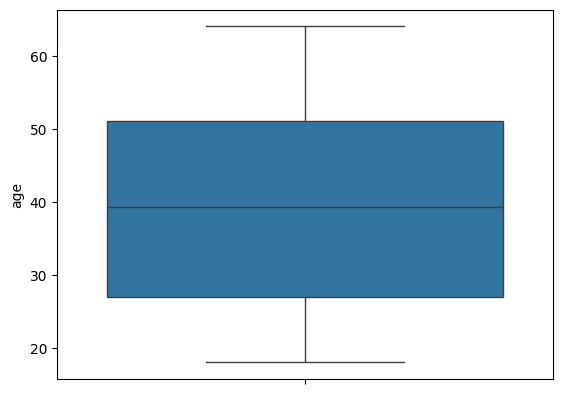

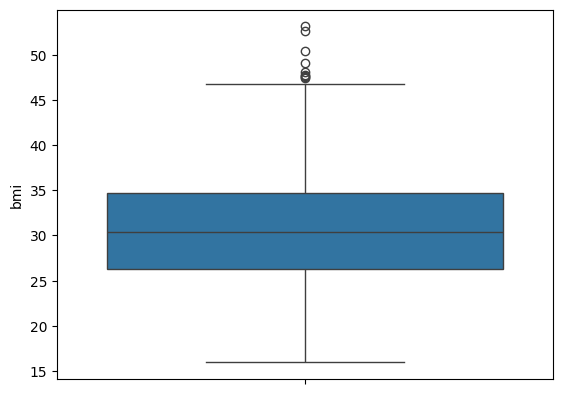

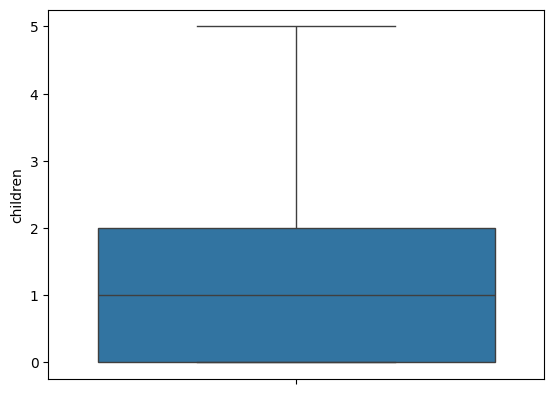

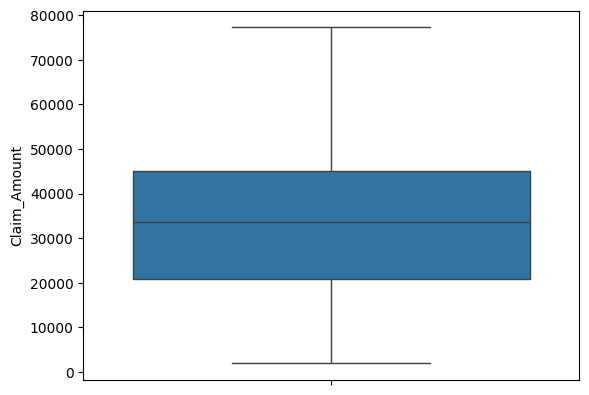

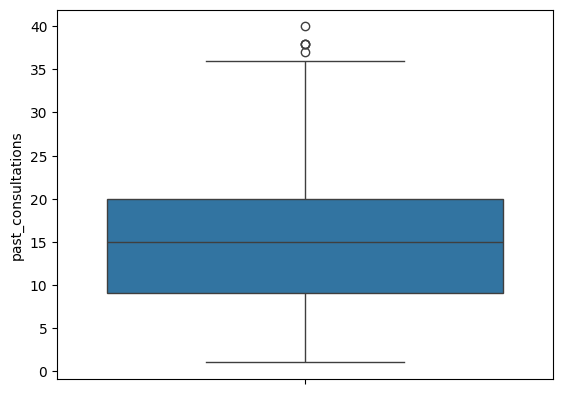

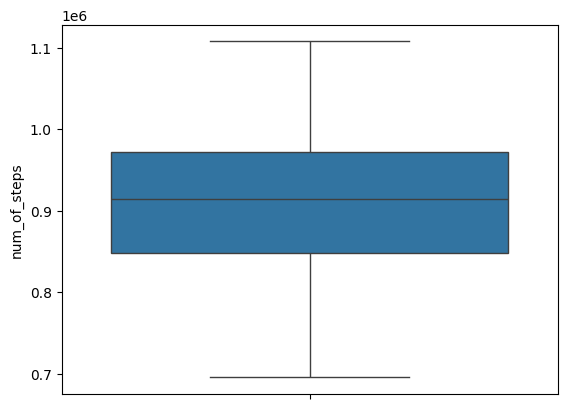

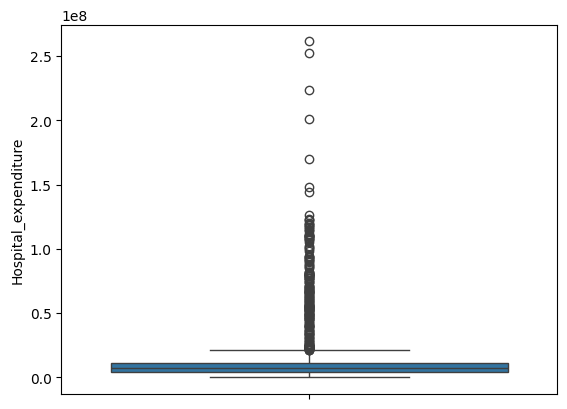

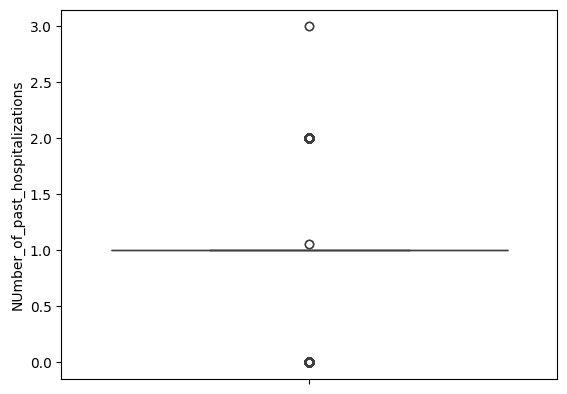

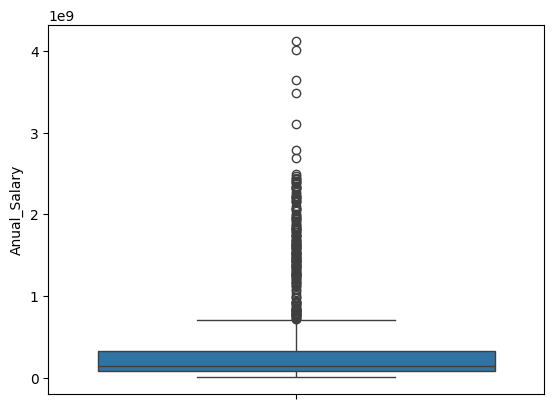

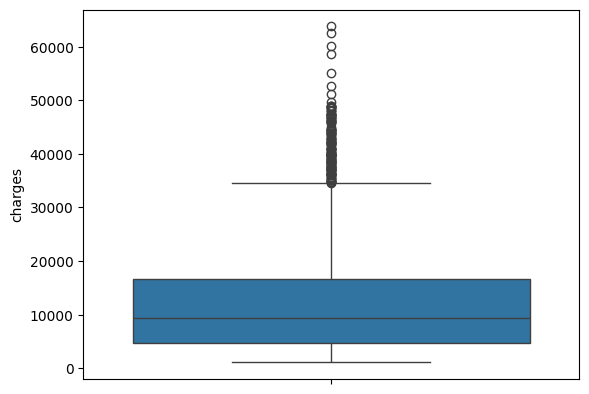

In [ ]:
#we do box plot for only numerical columns
for col in data.columns:
  if data[col].dtype!='object':
    sns.boxplot(data[col])
    plt.show()

bmi,past_consultations, Hospital_expenditure,
Anual_Salary, charges

In [ ]:
outlier_cols=['bmi', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary', 'charges']
for col in outlier_cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iq3=q3-q1
    lb=q1-1.5*iq3
    ub=q3+1.5*iq3
    data=data[(data[col]>=lb) & (data[col]<=ub)]

In [ ]:
data.shape

(1030, 13)

#label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for col in data.columns:
  if data[col].dtype=='object':
    data[col]=le.fit_transform(data[col]) # fit_transform() is inbuilt function of label encoder class



#Model building

1.splitting data into x and y variable

2.splitting the data into training and testing varible

3.model intialization

4. train the model

5.predictions on testing data

6.find the accuracy



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
#splitting data into x,y variables
x=data.drop('charges',axis=1)
y=data['charges']

In [ ]:
#spliting the training data and the testing data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=60)


In [ ]:
le=LinearRegression()
le.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_train_pred=le.predict(x_train)

In [ ]:
pd.DataFrame({'actual':y_train, 'predicted':y_train_pred})

,actual,predicted
912,13143.86485,12395.339811
286,4243.59005,4817.214548
304,4435.09420,4634.914790
553,7640.30920,9115.219280
320,4562.84210,3699.285415
...,...,...
122,2217.46915,2389.654309
73,1837.23700,1696.678460
100,2104.11340,2170.666713
401,5484.46730,5063.850808


In [ ]:
r2_score(y_train,y_train_pred)

0.9629462107359685

In [ ]:
y_test_pred=le.predict(x_test)
r2_score(y_test,y_test_pred)

0.9663914488361038